In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Feature Distributions:


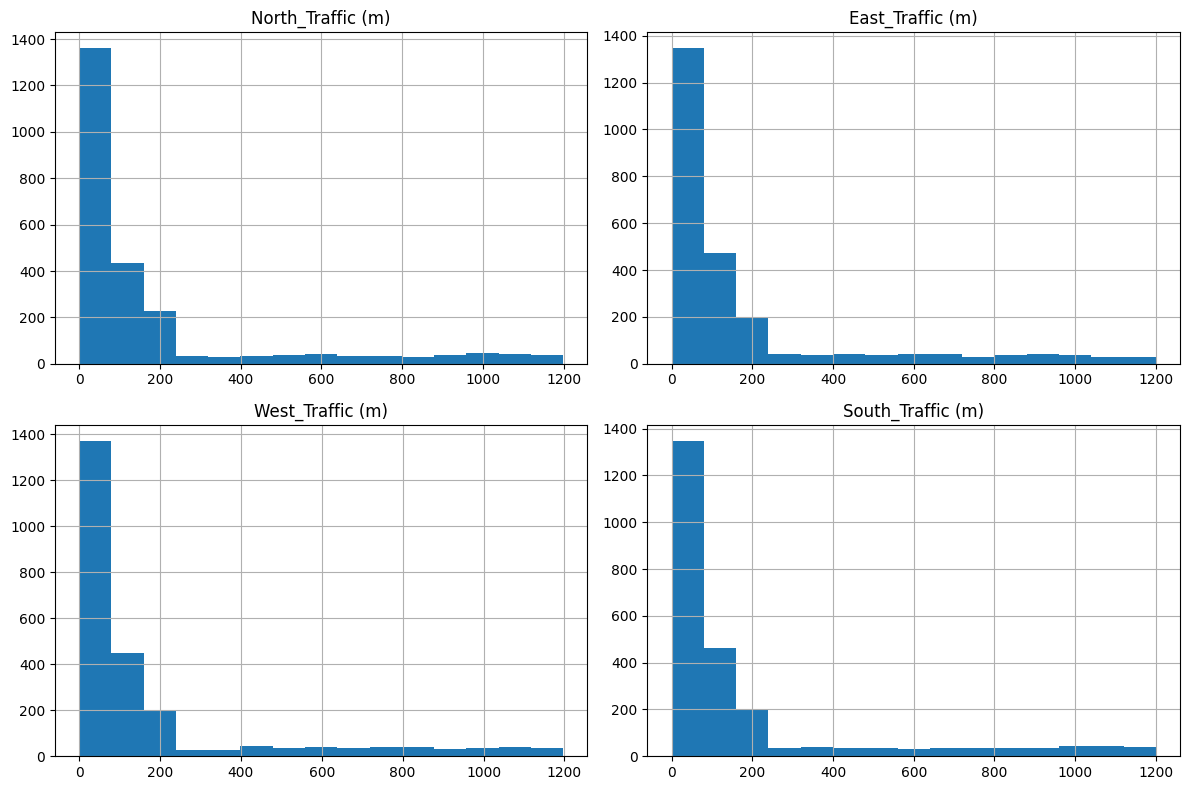


Target Distributions:


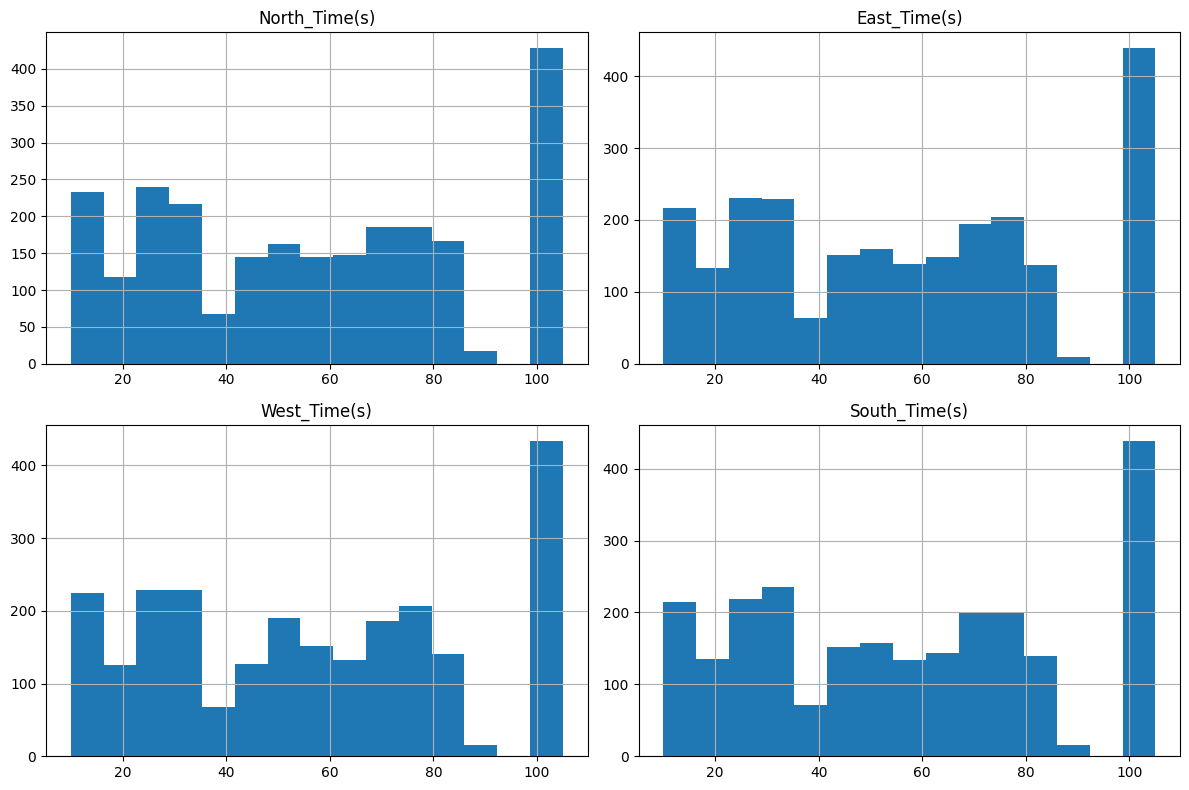

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your loaded DataFrame
# Make sure to load your data first:
# data = pd.read_csv('/path/to/your/traffic_data_final.csv')

features = ['North_Traffic (m)', 'East_Traffic (m)', 'West_Traffic (m)', 'South_Traffic (m)']
targets = ['North_Time(s)', 'East_Time(s)', 'West_Time(s)', 'South_Time(s)']

# Plot distributions for features
print("Feature Distributions:")
data[features].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot distributions for targets
print("\nTarget Distributions:")
data[targets].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

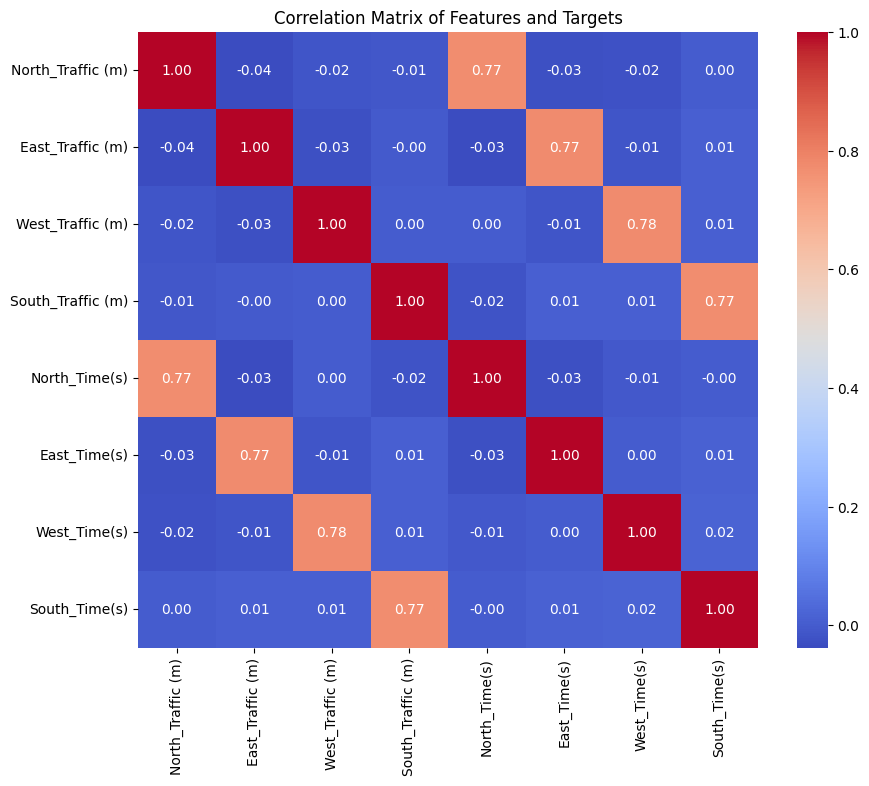

In [10]:
# Calculate the correlation matrix
correlation_matrix = data[features + targets].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Targets')
plt.show()

In [2]:

# ---------------------------
# 1. Load the Data
# ---------------------------
# Replace the file path if needed. Here, the CSV file is assumed to be in the same directory.
data = pd.read_csv('/content/drive/MyDrive/traffic_data_final.csv')

# Define the predictor features and target variables
features = ['North_Traffic (m)', 'East_Traffic (m)', 'West_Traffic (m)', 'South_Traffic (m)']
targets = ['North_Time(s)', 'East_Time(s)', 'West_Time(s)', 'South_Time(s)']

X = data[features]
y = data[targets]


In [3]:
# ---------------------------
# 2. Train-Test Split
# ---------------------------
# Splitting data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print("-------------------")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Accuracy
tolerance = 10

accuracy_per_target = {}
for i, col in enumerate(targets):
    correct_predictions = np.abs(y_test[col].values - y_pred[:, i]) <= tolerance
    accuracy = np.mean(correct_predictions) * 100  # Percentage
    accuracy_per_target[col] = accuracy
    print(f"Accuracy for {col} (within {tolerance} sec): {accuracy:.2f}%")

# Additionally: Compute overall sample accuracy where all predictions are within tolerance
all_correct = np.all(np.abs(y_test.values - y_pred) <= tolerance, axis=1)
overall_accuracy = np.mean(all_correct) * 100
print(f"Overall sample accuracy (all targets within {tolerance} sec): {overall_accuracy:.2f}%")

Evaluation Metrics:
-------------------
Mean Squared Error (MSE): 17.743539634146337
R^2 Score: 0.9810822607481332
Accuracy for North_Time(s) (within 10 sec): 97.15%
Accuracy for East_Time(s) (within 10 sec): 96.75%
Accuracy for West_Time(s) (within 10 sec): 96.14%
Accuracy for South_Time(s) (within 10 sec): 96.34%
Overall sample accuracy (all targets within 10 sec): 86.99%


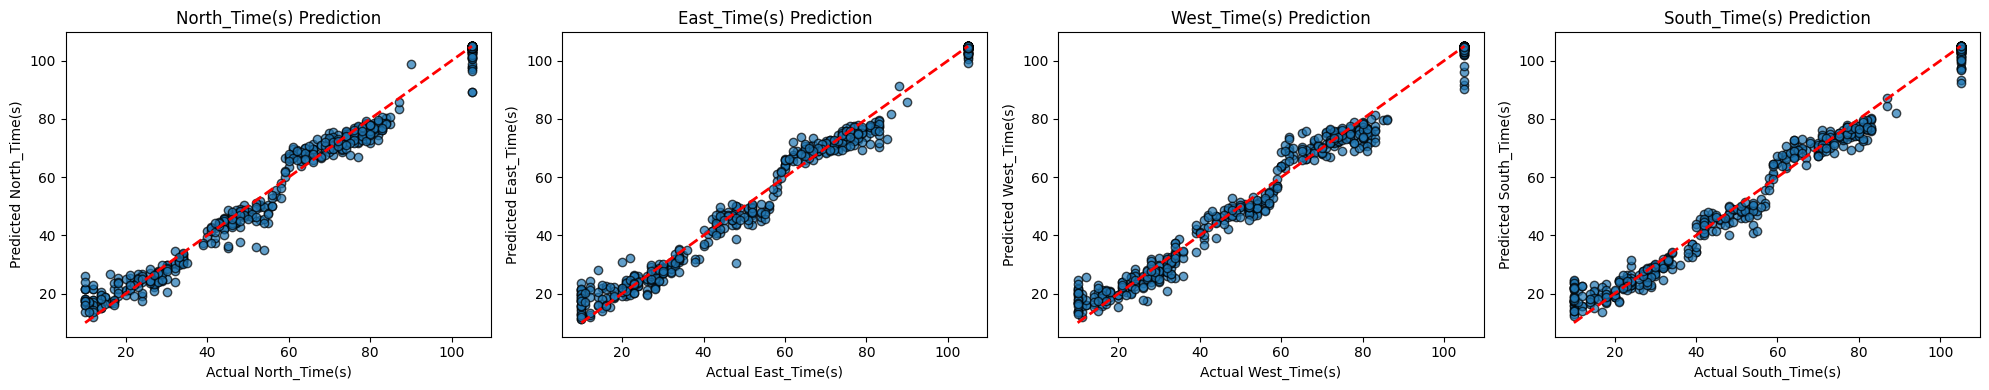

In [17]:

plt.figure(figsize=(20, 4))

for i, col in enumerate(targets):
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.7, edgecolor='k')
    plt.xlabel("Actual " + col)
    plt.ylabel("Predicted " + col)
    plt.title(col + " Prediction")

    # Plot the perfect prediction line (y = x) for reference
    all_vals = np.concatenate([y_test[col].values, y_pred[:, i]])
    lims = [all_vals.min(), all_vals.max()]
    plt.plot(lims, lims, 'r--', lw=2)

plt.tight_layout()
plt.show()

In [8]:

print("\nEnter new traffic values to predict the corresponding time estimates.")

user_input = []
for feature in features:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            user_input.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

user_input_array = np.array(user_input).reshape(1, -1)

predicted_times = rf_model.predict(user_input_array)

print("\nPredicted Time Values:")
for i, target in enumerate(targets):
    print(f"{target}: {round(predicted_times[0][i])} seconds")


Enter new traffic values to predict the corresponding time estimates.
Enter value for North_Traffic (m): 200
Enter value for East_Traffic (m): 100
Enter value for West_Traffic (m): 21
Enter value for South_Traffic (m): 0

Predicted Time Values:
North_Time(s): 75 seconds
East_Time(s): 72 seconds
West_Time(s): 32 seconds
South_Time(s): 22 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

joblib.dump(rf_model, 'traffic_rf_model.pkl')

['traffic_rf_model.pkl']